In [2]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf

from tensorflow import keras
from keras import models
from keras import layers

import streamlit as st


C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

In [2]:
os.chdir("C:\\Users\\chris\\OneDrive\\Desktop\\DropboxApplication")
os.getcwd()

'C:\\Users\\chris\\OneDrive\\Desktop\\DropboxApplication'

In [3]:
AllData = pd.read_csv("tagged_selections_by_sentence.csv")

In [4]:
AllData.columns

Index(['Dataset', 'Partition', 'SentenceID', 'Threshold', 'MergedSelections',
       'Unselected', 'Selected', 'Greeting', 'Backstory', 'Justification',
       'Rant', 'Gratitude', 'Other', 'Express Emotion'],
      dtype='object')

In [5]:
AllData['Unselected'][0]

" if we check in online, will this mean we automatically won't be able to get the seats with the extra legroom?"

In [6]:
InterestingData = AllData[['Unselected','Greeting']]

In [7]:
type(InterestingData)

pandas.core.frame.DataFrame

In [8]:
InterestingData.head()

,Unselected,Greeting
0,"if we check in online, will this mean we auto...",0
1,I am flying from Luton to Dalaman (Turkey) nex...,0
2,BA has won their case in the High Court attack...,0
3,does anyone know if we are allowed to take ou...,0
4,I have been advised that the best seating is i...,0


In [9]:
UnselectedUncodedInput = InterestingData['Unselected'].to_numpy()

In [10]:
InterestingData = InterestingData.dropna()

In [11]:
X = InterestingData['Unselected']
y = InterestingData['Greeting']

In [12]:
X=X.to_numpy()
y = y.to_numpy()

In [13]:
X = X.tolist()
y = y.tolist()

In [14]:
vect = CountVectorizer()

In [15]:
X = vect.fit_transform(X)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33,random_state=42)

In [17]:
X_train.shape

(4505, 7772)

In [18]:
X_test.shape

(2220, 7772)

In [19]:
X_train=X_train.toarray()
X_test=X_test.toarray()

In [20]:
X_train = X_train.tolist()
X_test = X_test.tolist()

In [21]:
type(X_test)

list

In [22]:
model1 = keras.Sequential([
    keras.layers.Dense(1,input_shape = (7772,),activation='sigmoid')
])

In [23]:
model1.compile(optimizer='sgd',loss='binary_crossentropy',metrics =['binary_accuracy'])

In [ ]:
model1.fit(x=X_train,y=y_train,epochs=5,batch_size=16)

In [ ]:
results = model1.evaluate(X_test,y_test)

In [ ]:
results 

In [ ]:
model1.predict(["hi"])

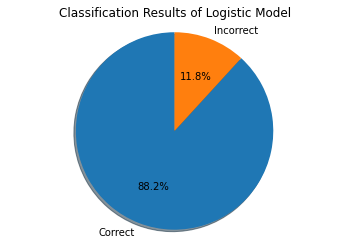

In [4]:
categories = 'Correct','Incorrect'
results = [88.2,11.8]

fig1, ax1 = plt.subplots()
plt.title("Classification Results of Logistic Model")
ax1.pie(results, labels=categories, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()